In [2]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [3]:
from scripts.data_load import *
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [4]:
data = load_data('../data/cleaned_brent_oil_prices.csv')
print(data.head())

   Unnamed: 0        Date  Price
0           0  1987-05-20  18.63
1           1  1987-05-21  18.45
2           2  1987-05-22  18.55
3           3  1987-05-25  18.60
4           4  1987-05-26  18.63


In [ ]:
# Prepare data for ARIMA
train_data = data[data['Date'] < '2020-01-01']
test_data = data[data['Date'] >= '2020-01-01']

# Fit ARIMA model
model = ARIMA(train_data['Price'], order=(5, 1, 0)) 
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data['Price'], forecast)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 22.24


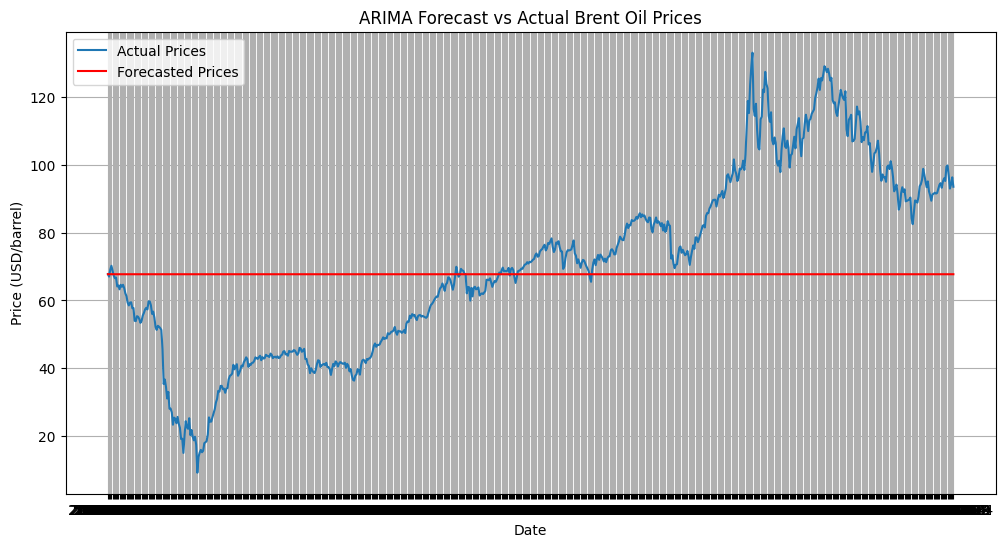

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Price'], label='Actual Prices')
plt.plot(test_data['Date'], forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast vs Actual Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()

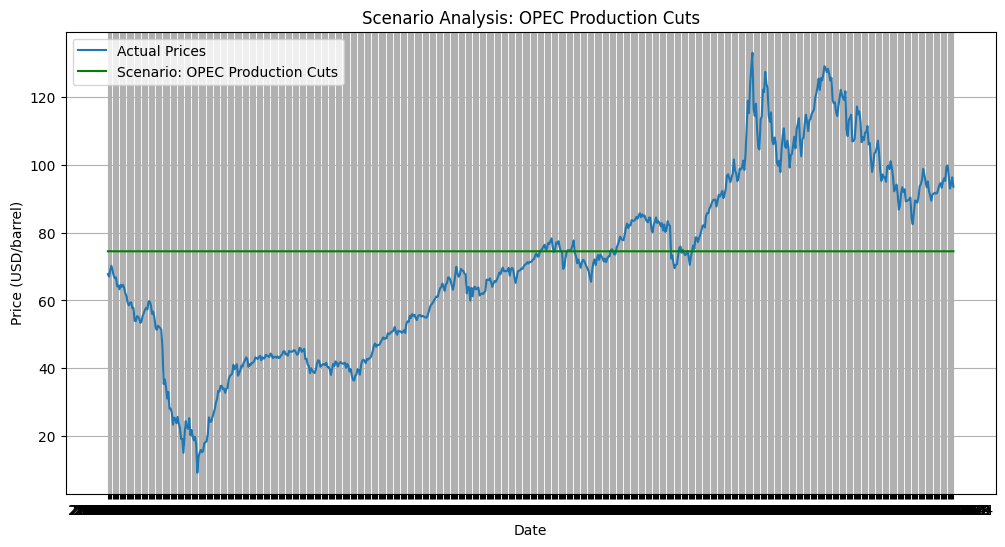

In [7]:
# Example: Simulate a 10% price increase due to OPEC production cuts
forecast_scenario = forecast * 1.10

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Price'], label='Actual Prices')
plt.plot(test_data['Date'], forecast_scenario, label='Scenario: OPEC Production Cuts', color='green')
plt.title('Scenario Analysis: OPEC Production Cuts')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()